### Overview:

STEPS
- collecting training and testing data 
- extracting features from IMU inputs 
- for each input gesture classifier needs to recognize the correct label
- draw visualization
- using this label as a key in dictionary we can send numpy array value to drone

### Questions

1) Get data
    - how to store it?
    - How to assign raw data samples with labels?
    - what are the features?
        - raw sensor inputs?
        - filtered with Kalman Filter?
    - what is the target?
    - target label (a letter) corresponds with numpy array of setpoints for drone
    
3) Choose the classifier
    - RandomForest
    - GradientBoosting
    - what quality metrics should we use?
    - Separate Trainin data, validation data and test data 
 

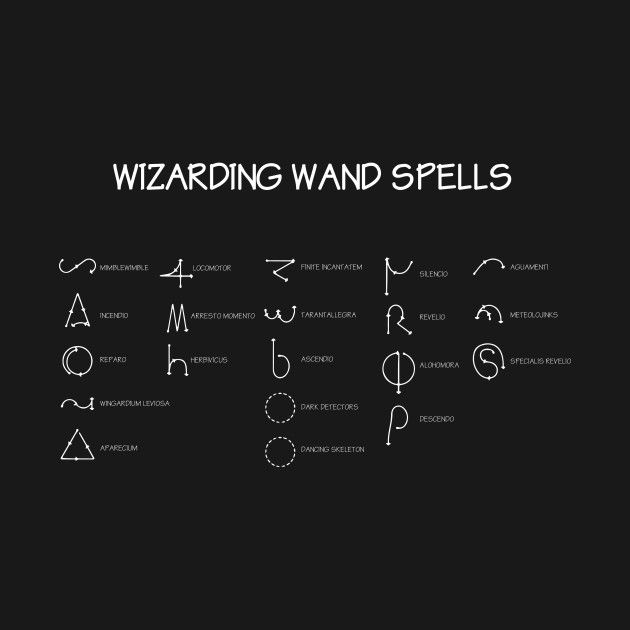

###  IMU Data Reading

In  our  project,  the  user wears the glove and performs one of four gesture patterns. We  use  the  Arduino Nano, IMU sensor MPU-6050 and flex sensor,  shown  in  Figure 2 , as our data input source.  

When flex sensor bends more than some threshold - data recording starts, when flex sensor is relaxed - data recording stops. To prevent drift of IMU readings we perform automatic reset before each new recording.

IMU provides us with 6 degree of freedom sensor readings
    - gyroscopes
    - accelerometers 
Inputs  from  IMU  are  streaming  to  local  PC through Arduino which is connected by USB

In order for the dataset to be more variative, non-uniform and robust to noise gestures we recorded data:
    - clock-wise
    - counterclock-wise
    - at different pitch-roll angle
    - upside-down
    - using 5 different hands for larger range of motions
    - moving with different speed

- Recognize fake gestures?

### Training Data Collection

For each of the letters [S, k, o, l] we collect 100 [?] sets of data samples manually. Each data sample is a sequence of 
    - raw IMU sensor readings? (6 features)
    - Kalman-filtered? (3 features)
that has a pre-defined start and ending time. We also include a label describing the gesture pattern for each data sample. 

For the first iteration of the project, the proposed algorithm should map 4 input gestures to 4 letters, which correspond to 4 sets of flight setpoints.

### Data Pre-Processing and Feature Extraction

To classify a specific gesture pattern accurately, we need to take into account of both the pose and the position of glove.

- we normalize the gyroscope and accelerometer inputs
- we process all our input sequences to be the same length by sampling within the start-end window
- we create a synthetic data with transform operators and inversing order of the original recordings (for [x, y, z])
-  each of our input data sample is a sequence of ___ dimensional feature arrays representing the status of the glove at a specific time step

### Training classifier

- use dimension reduction?
- 

### Arduino Software

- module responsible for writing data 

### The Drone part

these setpoints need to be sent to drone to follow this path

with numpy (x, y z) array make a drone to fly through these setponts (Roman)

control LED while flying

record the drone flight

Input: recorded gestures / path from glove with IMU

Output: drone light-painting the letter / word


# Let's begin

#### Import libs

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# ignore FutureWarning from sklearn
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

ModuleNotFoundError: No module named 'seaborn'

#### Read the data

#### Draw raw data

#### Filter data

#### Normalize data (starts from zero; no depth - only vertical plane [x, z])

#### Make each sequence the same length

#### Draw filtered data

#### Get train, validating and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Check ranges of the data

In [ ]:
X.max(0) - X.min(0)

#### Choose metrics

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

def evaluate_model(model, ):
    
    with np.printoptions(precision=3, suppress=True):
        print(scaler.mean_)
    
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
    y_pred_cv = cross_val_predict(clf, X, y, cv=5)
    print('KFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )
    
    print('Accuracy of prediction is {}'.format(accuracy_score(y, y_predicted)))
    print('Accuracy of prediction on train set is {}'.format(accuracy_score(y_train, y_predicted)))
    print('Accuracy of prediction on test set is {}'.format(accuracy_score(y_test, y_predicted)))
    
    
    print('Accuracy', accuracy_score(y_train, clf.predict(X_train)))
    print('Precision', precision_score(y_train, clf.predict(X_train)))
    print('Recall', recall_score(y_train, clf.predict(X_train)))
    
    print('Accuracy', accuracy_score(y_test, clf.predict(X_test)))
    print('Precision', precision_score(y_test, clf.predict(X_test)))
    print('Recall', recall_score(y_test, clf.predict(X_test)))
    

    print(classification_report(y, y_pred))
    
    pass

#### Split data using StratifiedKFold

In [ ]:
from sklearn.model_selection import StratifiedKFold

stratifiedKFold = StratifiedKFold(n_splits=5, shuffle=True)
cv = stratifiedKFold.split(X, y)


#### Try Nearest-Neighbor Classifier (don't forget to normalize data)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

gs_knn = GridSearchCV(knn, param_grid={"n_neighbors":list(range(1, 20))}, 
                  cv=cv)
gs_knn.fit(X, y)

y_predicted = gs_knn.predict(X_test)



#### RESULTS: Nearest-Neighbor Classifier

In [ ]:
# params = [x['n_neighbors'] for x in gs_knn.cv_results_['params']]
# fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=600)
# plt.plot(params, gs_knn.cv_results_['mean_test_score'])

#### Try Logistic Regression

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(StandardScaler(), LogisticRegressionCV(solver='lbfgs'))
lr.fit(X_train, y_train)

#### RESULTS: Logistic Regression 

#### Random Forest Classifier

##### choose metrics!  roc_auc or accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import Normalizer

gs_rfc = GridSearchCV(RandomForestClassifier(), 
                   {'n_estimators':[50, 100, 200, 300, 400, 500, 750], 
                    'max_depth':[2, 3, 4, 6, 10, 15]
                   },
                   scoring='roc_auc', cv=3)
gs_rfc.fit(X_train, y_train)
y_predict = gs_rfc.predict(X_test)
y_predict_proba = gs_rfc.predict_proba(X_test)[:,1]

# move to evaluate model!
print(gs_rfc.best_score_)
print('roc auc', roc_auc_score(y_test, y_predict_proba))
print(gs_rfc.best_params_)

scores = cross_val_score(gs_rfc, X, y, scoring='accuracy', cv=kfold.split(X, y))
print('KFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

#### RESULTS: Random forest

In [ ]:
params = [x['n_estimators'] for x in gs.cv_results_['params']]
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=600)
plt.plot(params, gs.cv_results_['mean_test_score']);
ax.set_xlabel('n_estimators')
ax.set_ylabel('KFold score')
plt.savefig('img/forest_results.png',bbox_inches='tight');
plt.close(fig);

#### Perform feature selection

## Resources

[1] Real-time Gesture Pattern Classification with IMU Data. 
Alex Fu, Yangyang Yu
http://stanford.edu/class/ee267/Spring2017/report_fu_yu.pdf

- lib for training with IMU

